In [95]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split



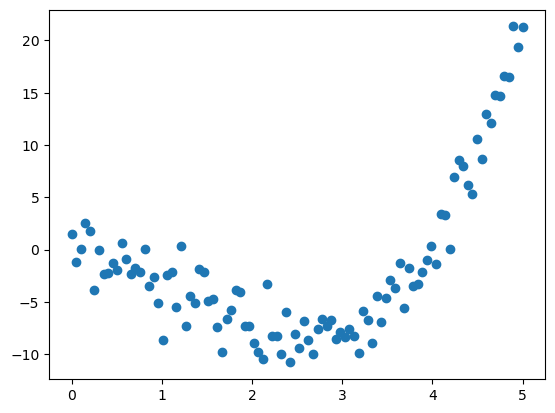

In [96]:
np.random.seed(0)
x = np.linspace(0,5,100)
y = x - 3.3 * (x ** 2) + 0.8 * (x ** 3) + np.random.normal(-2,2,100)
plt.scatter(x, y)

In [97]:
X= x[:,np.newaxis]
'''
Newaxis pour transformer l'array 1D en vecteur colonne // [np.newaxis,:] vecteur ligne // [:,np.newaxis] vecteur colonne
'''
X = PolynomialFeatures(degree=10, include_bias=False).fit_transform(X)
X.shape #check les dimensions de X

(100, 10)

In [98]:
#Train set et Test set avec train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #argument test_size : 20% du set en test, 

Coef R2 train :  0.9414895881614311
Coef R2 test : 0.6245580136806588


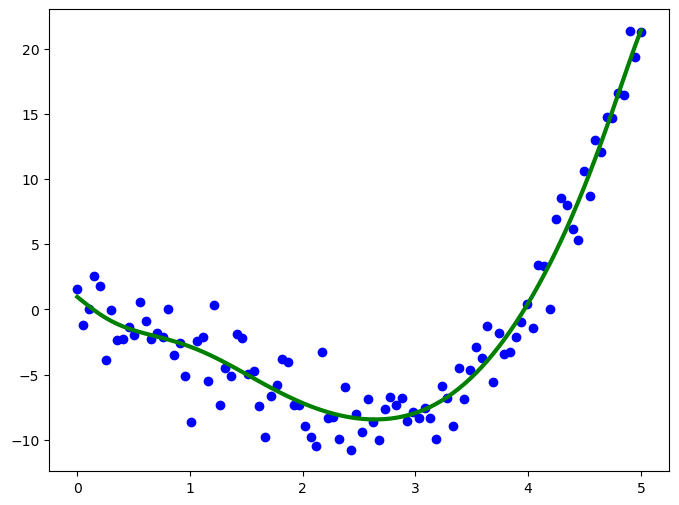

In [99]:
model1= LinearRegression()
model1.fit(x_train, y_train)
print('Coef R2 train : ', model1.score(x_train,y_train))
print('Coef R2 test :', model1.score(x_test,y_test))
score_lr_test = model1.score(x_test,y_test)
plt.figure(figsize=(8,6))
plt.scatter(x,y, c='blue')
a= np.linspace(0,5,100).reshape((100,1))
A= PolynomialFeatures(degree=10, include_bias=False).fit_transform(a)
plt.plot(a, model1.predict(A), c ='green', lw=3)

Coef R2 train :  0.9876735894401374
Coef R2 test : 0.9543331750964612


Text(0, 0.5, 'y')

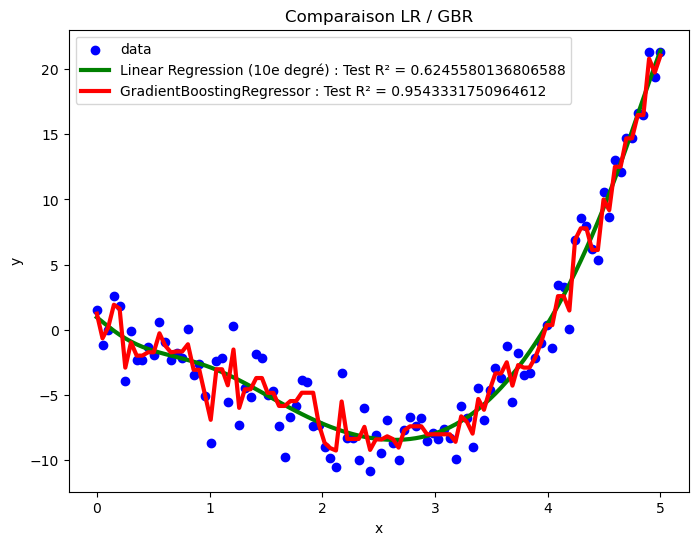

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
x = x[:,np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1) #argument test_size : 20% du set en test, 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_y_gbr = gbr.predict(x_test)
plt.figure(figsize=(8,6))
plt.scatter(x,y, c='blue', label = 'data')
# plt.scatter(x_test, pred_y_gbr, c ='green')
print('Coef R2 train : ', gbr.score(x_train,y_train))
print('Coef R2 test :', gbr.score(x_test,y_test))
score_gbr_test = gbr.score(x_test,y_test)
plt.plot(a, model1.predict(A), c ='green', lw=3, label = f'Linear Regression (10e degré) : Test R² = {score_lr_test}')
plt.plot(a, gbr.predict(a), c ='red', lw=3, label = f'GradientBoostingRegressor : Test R² = {score_gbr_test}')
plt.legend()
plt.title('Comparaison LR / GBR')
plt.xlabel('x')
plt.ylabel('y')

loss='squared_error',
								learning_rate=0.1,
								n_estimators=100,
								max_depth = 2, 
                                min_samples_split=2,
								max_features = 2